In [ ]:
import pandas as pd
import numpy as np
cancer = pd.read_csv("/content/drive/MyDrive/manufacturing_defect_dataset.csv")
cancer.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [ ]:
x = cancer.drop('DefectStatus',axis=1)
y = cancer['DefectStatus']

In [ ]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)

[[0.1134594  0.5452628  0.3324451  ... 0.92347584 0.50574348 0.34076495]
 [0.48387097 0.98510528 0.3155384  ... 0.04820559 0.89788481 0.63472859]
 [0.95661846 0.93780213 0.10646569 ... 0.99221494 0.61810274 0.74036833]
 ...
 [0.81757508 0.44927082 0.8219781  ... 0.56427061 0.49295387 0.26584895]
 [0.2246941  0.57786376 0.55468094 ... 0.30681199 0.30854412 0.25904918]
 [0.2836485  0.57115468 0.17969703 ... 0.26514231 0.14580895 0.5618573 ]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU

In [ ]:
# Check the shape of x_train before training
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.5405 - accuracy: 0.8356
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8399
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8399
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8399
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8399
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8399
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8399
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8399
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8399
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.839

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

(2592, 16)
Epoch 1/5
81/81 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.7635
Epoch 2/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8399
Epoch 3/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8399
Epoch 4/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8399
Epoch 5/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8399


In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.6814 - accuracy: 0.5706
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.8329
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8399
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8399
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8399
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.8399
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.8399
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8399
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8399
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.839

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

(2592, 16)
Epoch 1/5
81/81 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8391
Epoch 2/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8399
Epoch 3/5
81/81 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8418
Epoch 4/5
81/81 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8607
Epoch 5/5
81/81 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8738


In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.7870
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8399
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8403
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8465
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8588
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8711
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8750
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8800
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8808
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.878

In [ ]:
pip install pydot graphviz

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 2s 3ms/step - loss: 0.7951 - accuracy: 0.1883
Epoch 2/200
81/81 [==============================] - 0s 3ms/step - loss: 0.7927 - accuracy: 0.1910
Epoch 3/200
81/81 [==============================] - 0s 3ms/step - loss: 0.7901 - accuracy: 0.1929
Epoch 4/200
81/81 [==============================] - 0s 5ms/step - loss: 0.7875 - accuracy: 0.1952
Epoch 5/200
81/81 [==============================] - 0s 5ms/step - loss: 0.7847 - accuracy: 0.1979
Epoch 6/200
81/81 [==============================] - 0s 6ms/step - loss: 0.7818 - accuracy: 0.2002
Epoch 7/200
81/81 [==============================] - 1s 8ms/step - loss: 0.7789 - accuracy: 0.2064
Epoch 8/200
81/81 [==============================] - 1s 6ms/step - loss: 0.7758 - accuracy: 0.2118
Epoch 9/200
81/81 [==============================] - 1s 7ms/step - loss: 0.7728 - accuracy: 0.2157
Epoch 10/200
81/81 [==============================] - 1s 6ms/step - loss: 0.7696 - accuracy: 0.220

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],))) # Dynamically set input shape
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8395
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8399
Epoch 3/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8403
Epoch 4/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8468
Epoch 5/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8646
Epoch 6/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8719
Epoch 7/200
81/81 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8742
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8769
Epoch 9/200
81/81 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8812
Epoch 10/200
81/81 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.879

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

(2592, 16)
Epoch 1/5
81/81 [==============================] - 1s 2ms/step - loss: 0.5203 - accuracy: 0.7932
Epoch 2/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.8383
Epoch 3/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8387
Epoch 4/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8403
Epoch 5/5
81/81 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8395


In [ ]:
 print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.7471 - accuracy: 0.3924
Epoch 2/200
81/81 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5737
Epoch 3/200
81/81 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6485
Epoch 4/200
81/81 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.7160
Epoch 5/200
81/81 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7620
Epoch 6/200
81/81 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7789
Epoch 7/200
81/81 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7990
Epoch 8/200
81/81 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.8171
Epoch 9/200
81/81 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.8229
Epoch 10/200
81/81 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.824

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.5836 - accuracy: 0.7106
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8364
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8380
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8399
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8395
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8395
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8399
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8399
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8399
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.839

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 1.3101 - accuracy: 0.1705
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 1.3309 - accuracy: 0.1663
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 1.3098 - accuracy: 0.1725
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 1.3029 - accuracy: 0.1725
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 1.2908 - accuracy: 0.1674
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 1.3063 - accuracy: 0.1640
Epoch 7/200
81/81 [==============================] - 1s 9ms/step - loss: 1.2902 - accuracy: 0.1690
Epoch 8/200
81/81 [==============================] - 0s 4ms/step - loss: 1.2971 - accuracy: 0.1728
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 1.2813 - accuracy: 0.1698
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 1.2801 - accuracy: 0.174

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7840
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8387
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8391
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3876 - accuracy: 0.8426
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8441
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8457
Epoch 7/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8530
Epoch 8/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8565
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8580
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.854

In [ ]:
print(x_train.shape)

model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dropout(0.4)) # Dynamically set input shape
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200)

(2592, 16)
Epoch 1/200
81/81 [==============================] - 1s 2ms/step - loss: 0.5952 - accuracy: 0.6709
Epoch 2/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8395
Epoch 3/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8399
Epoch 4/200
81/81 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8399
Epoch 5/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8403
Epoch 6/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8422
Epoch 7/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8449
Epoch 8/200
81/81 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8476
Epoch 9/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8476
Epoch 10/200
81/81 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.853

In [ ]:
y_pred=model.predict(x_test)
y_pred
y_pred=np.where(y_pred>0.5,1,0)
y_pred=y_pred.astype(int)
import numpy as np
np.column_stack((y_pred,y_test))

21/21 [==============================] - 0s 2ms/step


array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [0, 0],
       [1, 1],
       [1, 1]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9228395061728395
[[ 64  38]
 [ 12 534]]


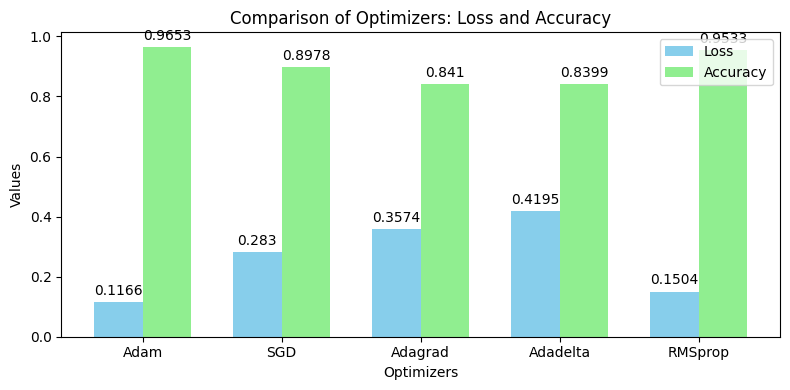

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Final loss and accuracy values for each optimizer
optimizers = ['Adam', 'SGD', 'Adagrad', 'Adadelta', 'RMSprop']
loss_values = [0.1166 , 0.2830  , 0.3574 , 0.4195, 0.1504  ]
accuracy_values = [0.9653, 0.8978, 0.8410, 0.8399, 0.9533]

x = np.arange(len(optimizers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 4))

# Plotting the loss values
bars1 = ax.bar(x - width/2, loss_values, width, label='Loss', color='skyblue')

# Plotting the accuracy values
bars2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy', color='lightgreen')

# Adding labels, title, and legend
ax.set_xlabel('Optimizers')
ax.set_ylabel('Values')
ax.set_title('Comparison of Optimizers: Loss and Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(optimizers)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

21/21 [==============================] - 0s 2ms/step
[[ 64  38]
 [ 12 534]]
0.9228395061728395


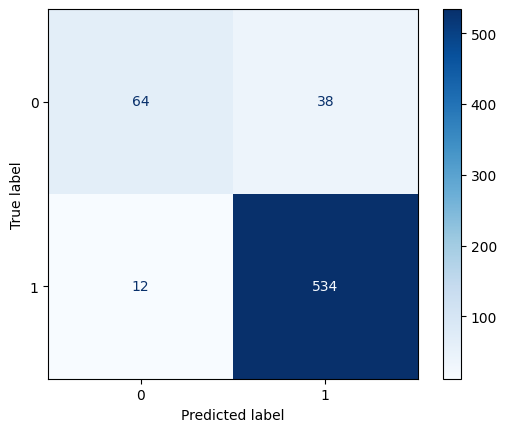

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
y_pred=model.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)
y_pred = y_pred.flatten() # Add this line to flatten the array
y_pred=y_pred.astype(int)
import numpy as np
np.column_stack((y_pred,y_test))

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()